# ELE510 Image Processing with robot vision: LAB, Exercise 1, Fundamentals.

**Purpose:** *To learn some basic operations on images using Python, OpenCV and other packages. The emphasis is on the fundamentals of digital images.*

The theory for this exercise can be found in chapter 1 and 2 of the text book [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

**a)** What does a pixel value represent? What is the standard bit depth and why is it the common practice?

_What does a pixel value represent?_

A pixel value represents the intensity or color information for that specific location in an image. The interpretation of this value varies depending on the type of image, e.g.:
 - **Grayscale Images**: A pixel value typically represents the intensity of light, where lower values might indicate darker areas (like 0 for black) and higher values indicate lighter areas (like 255 for white in an 8-bit image).
 - **Color Images (e.g., RGB)**: Each pixel has multiple values, often three: one for the red channel, one for the green channel, and one for the blue channel. Each of these values typically indicates the intensity of color for that channel at the specific pixel

_What is the standard bit depth?_

The **bit depth** of an image refers to the number of bits used to represent each pixel value. The more bits you have, the more intensities or colors you can represent. A very common bit depth for a single value is **8-bit**: Standard for grayscale images, can represent $2^8 = 256$ different intensities. Thus, in color images, we often see 8-bit values for each of the color channels, resulting in 24-bit total per pixel in the case of an RGB image.

_Why is 8-bit a common practice for grayscale and 24-bit for RGB?_

 - **Storage**. 8-bit are exactly one byte. CPU register sizes, cache and memory line widths, and storage block sizes are often multiples of one byte. This makes 8-bit a natural choice for many applications.
 - **Human Perception**: $256 = 2^8$ intensity levels for grayscale images and $16.7M = (2^8)^3 = 2^{24}$ colors for RGB images are generally sufficient to produce images that appear continuous in tone to the human eye. Higher bit depths would offer more precision, but the difference would often be imperceptible to human viewers.

**b)** What is the difference between image processing and image analysis? What primary problems are they trying to solve?

**Image processing** involves manipulating an image to enhance, restore, or modify its visual appearance, **turning one image into another**.
Its primary goal is to improve the image's quality or prepare it for further operations.
For instance, increasing brightness, removing noise, or adjusting contrast.

**Image analysis**, on the other hand, **seeks to understand and extract meaningful data from an image**.
It interprets the image's content, identifies patterns, and extracts high-level information, such as identifying objects or recognizing patterns.

**c)** Given a storage space of 512 GB, we would like to save a digital video recorded in grayscale that fills all the available memory. The video was recorded with no compression, a frame rate of 100 frames per second, and an image frame of $2048 \times 1024$ pixels. Then, how long would the lenght of the video be in time? Please provide an answer in HH:MM:SS format.

**Note:**
 - Based on answer to question 1.a), we assume each pixel value is represented by 8 bits.
 - $8 \text{ bits} = 1 \text{ byte}$
 - $1 \text{ GB} = 1024 \text{ MB} = 2^{10} \text{ MB} = 2^{10} * 2^{10} \text{ KB} = 2^{20} \text{ KB} = 2^{20} * 2^{10} \text{ bytes} = 2^{30} \text{ bytes}$

1. Calculate the number of bits per frame:
$$2048 \times 1024 \times 8 \text { bits} = 2048 \times 1024 \text{ bytes} = 2 * 2^{10} * 2^{10} \text{ bytes} = 2^{21} \text{ bytes}$$

2. Calculate the number of frames that can be stored in 512 GB:
$$\frac{512 \text{ GB}}{2^{21} \text{ } \frac{\text{bytes}}{\text{frame}}} = \frac{512 * 2^{30} \text{ bytes}}{2^{21} \text{ } \frac{\text{bytes}}{\text{frame}}} = 512 * 2^{9} \text{ frames} = 512 * 512 \text{ frames} = 2^{18} \text{ frames} = 262144 \text{ frames}$$

3. Calculate the lenght of the video in time:
(shot at 100 frames per second)
 - Total time in seconds: $\frac{262144 \text{ frames}}{100 \text{ frames/second}} = 2621.44 \text{ seconds}$
 - Total time in minutes: $\frac{2621.44 \text{ seconds}}{60 \text{ seconds/minute}} = 43.69 \text{ minutes}$
 - Total time in hours: $\frac{43.69 \text{ minutes}}{60 \text{ minutes/hour}} = 0.72 \text{ hours}$

 - Whole hours: $wh = \lfloor 0.72 \text{ hours} \rfloor = 0 \text{ hours}$
 - Whole minutes: $wm = \lfloor 43.69 \text{ minutes} \rfloor - wh * 60 \text{ minutes/hour} = 43 \text{ minutes}$
 - Whole seconds: $ws = \lfloor 2621.44 \text{ seconds} \rfloor - wm * 60 \text{ seconds/minute} - wh * 60 * 60 \text{ seconds/hour} = 2621 - 43 * 60 = 1 2621 - 2580 = 41 \text{ seconds}$


**Answer:** The lenght of the video is 00:43:41 (HH:MM:SS) and 44 milliseconds can be stored in 512 GB.


## Problem 2

In this problem we use one image, `flower.jpg` (relative path: `./images/flower.jpg`).


**a)** Import the image; let the name of the flower image be **A**. Find the following properties: height, width, channels, filesize [+]. Be aware tha opencv represents image colar channel in the order BGR (blue, green, red) instead of RGB as is more common.  Matplotlib use RGB, so if we are using matplotlib to show images they need to be converted first.

**b)** Image **A** is represented as a 3D array in Python. With **A** as input we now want to extract 4 different 2D images:
   - **R** representing the red colour component, 
   - **G** representing the green colour component,
   - **B** representing the blue colour component, and
   - **Gr** representing a grey level version.
    
The rgb components are found by using `A[:,:,k]` where `k=1,2 and 3`. The grey level image can be imported using a particular flag (`cv2.IMREAD_GRAYSCALE`), or converted from an already imported color-image to grayscale (find the cv2 function yourself in the documentation). Use `matplotlib` to display the colour image and the 3 colour components in the same figure.

Describe how the different colour components contributes to different parts of the image (the petals and the background). Show the gray level image in a separate figure. Describe this image in relation to the colour components.


<div class="alert alert-block alert-info">
    The filesize can be checked in <b>bytes</b> using the following commands: 

```python
import os 
filesize = os.path.getsize(my_path)
```
</div>


In [1]:
# Import useful packages
import os # useful for the filesize
import cv2
import matplotlib.pyplot as plt 

# Complete the parts with "..."

########################################################
######## a) 
# Import the image, which is located in the folder images/ (you can download it from CANVAS)
A_path = "./images/flower.jpg"
A = cv2.imread(A_path) 
# Convert the image from BGR (OpenCV standard) to RGB (standard)  
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

# image properties
height = A.shape[0]
width = A.shape[1]
channels = A.shape[2]
filesize = os.path.getsize(A_path)
 
print('Image Dimension    : ', A.shape) 
print('Image Height       : ', height)
print('Image Width        : ', width)
print('Number of Channels : ', channels)

## The results should be:
# Image Dimension    :  (667, 500, 3)
# Image Height       :  667
# Image Width        :  500
# Number of Channels :  3

print('Image size         : ', filesize/1024, 'KB')

Image Dimension    :  (667, 500, 3)
Image Height       :  667
Image Width        :  500
Number of Channels :  3
Image size         :  48.078125 KB


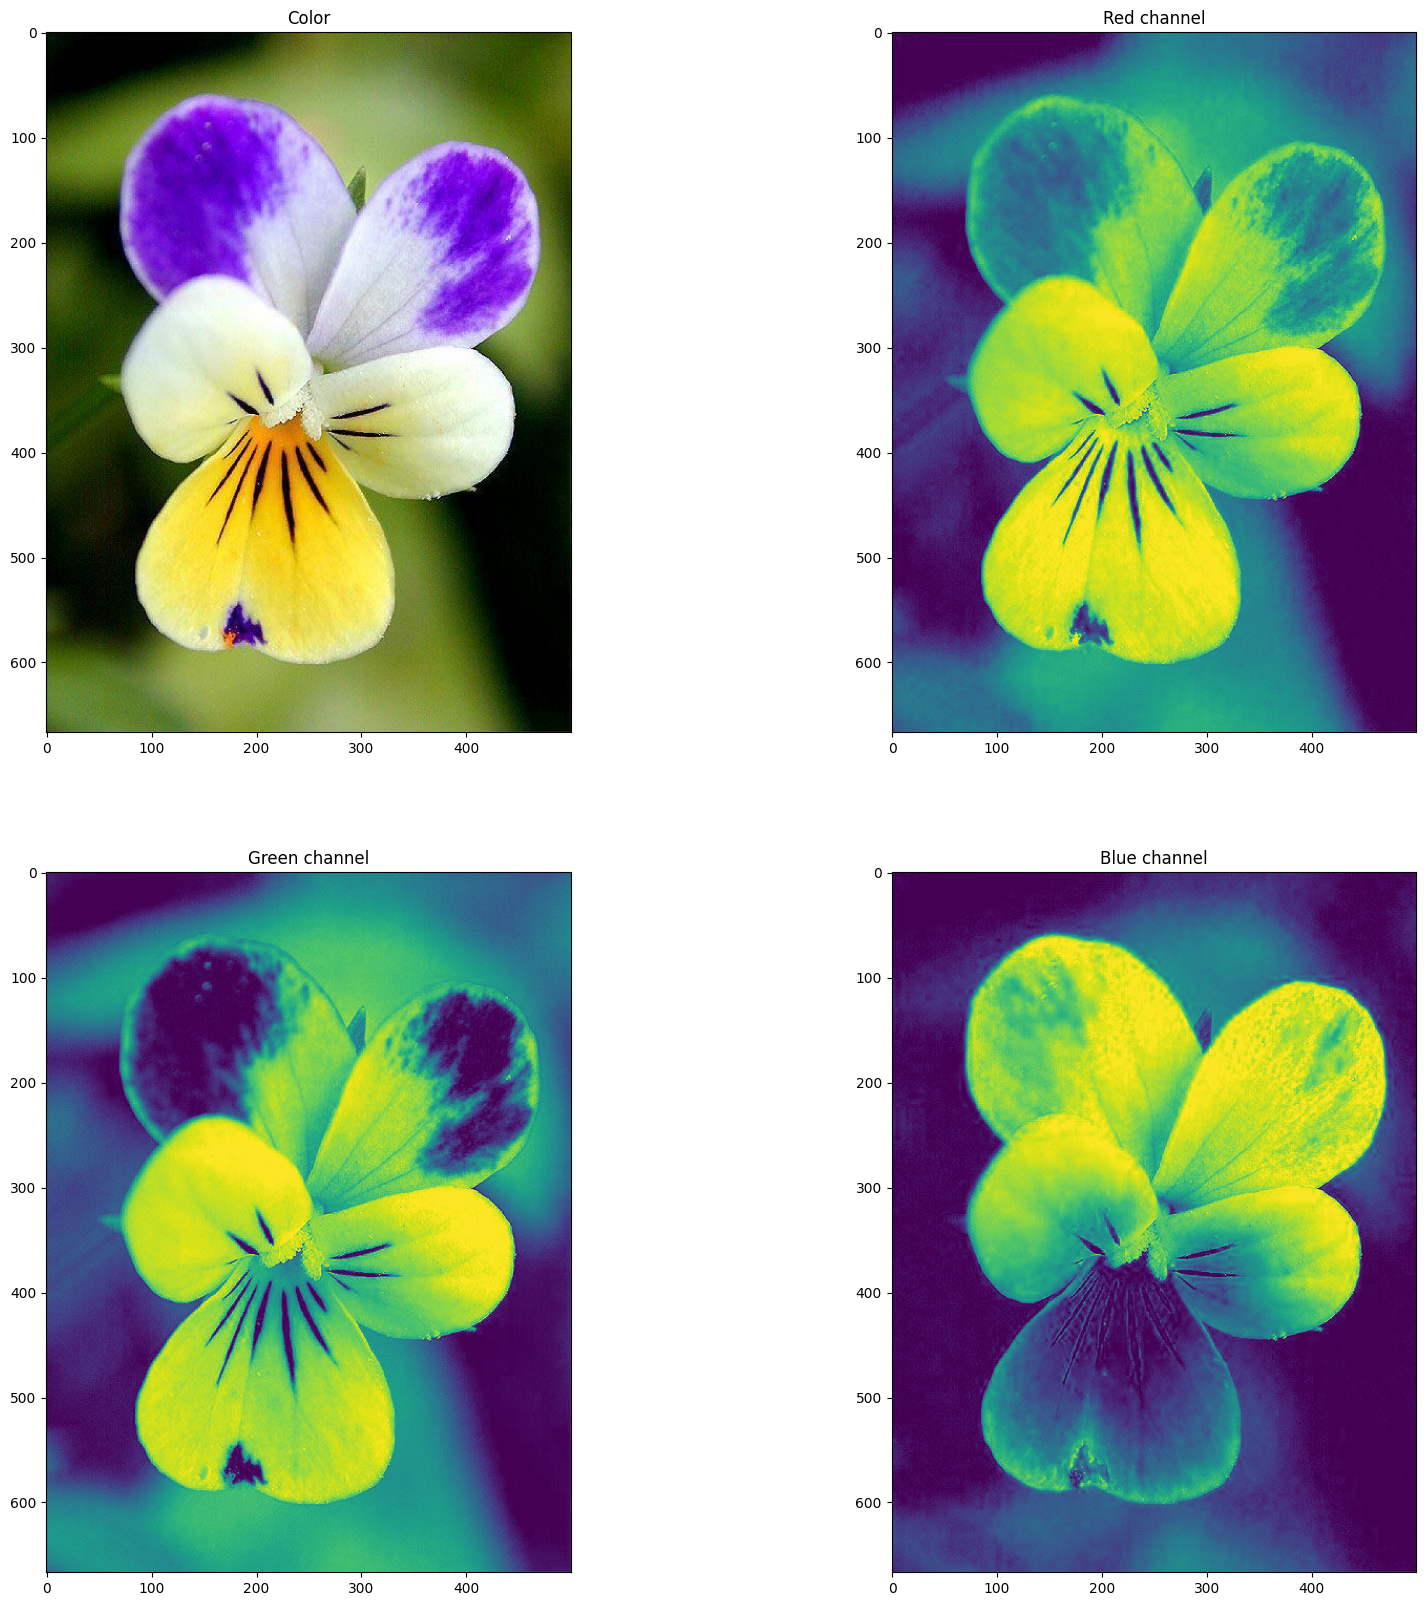

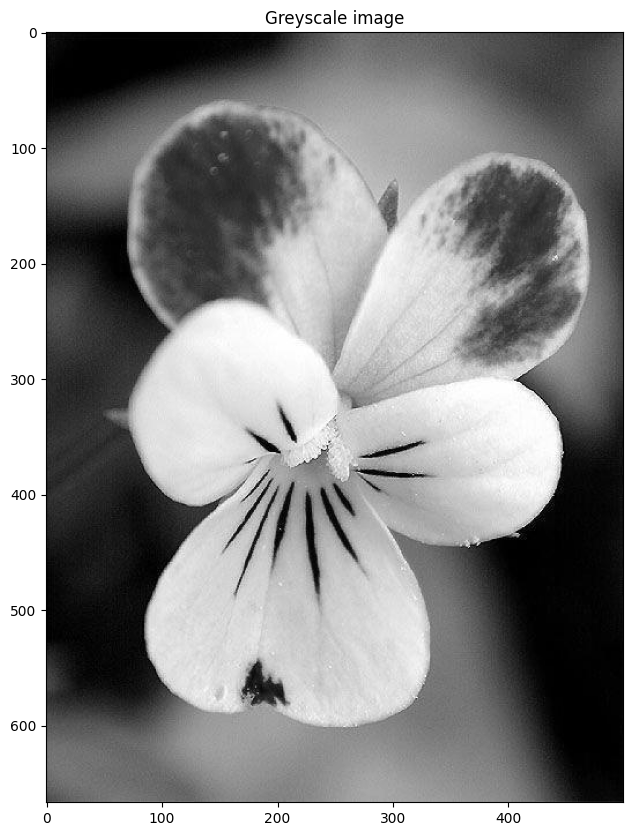

In [2]:
########################################################
######## b). 
# Extract 2D images (the various channels + grayscale)
R = A[:,:,0]
G = A[:,:,1]
B = A[:,:,2]

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(A)
plt.title('Color')
plt.subplot(222)
plt.imshow(R)
plt.title('Red channel')
plt.subplot(223)
plt.imshow(G)
plt.title('Green channel')
plt.subplot(224)
plt.imshow(B)
plt.title('Blue channel')
plt.show()

# Greyscale image
Gr = cv2.imread(A_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(Gr, cmap='gray', vmin=0, vmax=255)
plt.title('Greyscale image')
plt.show()


**Answer to question 2 b)** (describe): 

First and foremost, we can observe that in the original image the three bottom petals have very dark stripes.
Dark colors are represented by low values in the color bands, which we can also see in these stripes in each of the three color images.
Similarly, these stripes are also visible in the grayscale image, which is expected since the grayscale image is a linear combination of the three color images.

Now, the two top petals, as well as the bottom petal have deep purple spots. We can also read the color purple from our color images: At these spots the red and blue bands have a similar intensity, while the green band has a - relatively - low intensity. Now, we can also observe that while the actual hue of the purple does not differ between the top petals and the bottom petal, the bottom petals purple is a lot darker. This is not only reflected in the grayscale image, but also in the relative intensities of each of the color bands.

Furthermore, the bottom petal has an overall intense yellow color. The red and green image bands have a quite high value here, while there is pretty much no blue color present at these locations.

Finally, I'd like to point out the background. The dark spots in the background are of course represented by low intensities in each of the three color bands, resulting in black pixels in the grayscale image.
The background-leaves are quite green, which of course is reflected in the green color band. However, we see that increases at some of those locations in the red band correspond to very bright green-colors in the background (also seen in the greyscale image). However, the blue color component has very little influence on the background.

## Problem 2 continues

**c)** The image data can be written to new files with a chosen format. Use `cv2.imwrite` and JPG. We want to study different degrees of compression by using `[cv2.IMWRITE_JPEG_QUALITY, jpg_quality]` as option in the `cv2.imwrite` function, where `cv2.IMWRITE_JPEG_QUALITY` is the quality flag, and `jpg_quality` is the selected quality for saving the image. Let `jpg_qualities` be `[25,50,75,100]` and make a graph that show the filesize in kB as a function of `jpg_qualities` for this image. When a repeated procedure is done, like in this case, it is efficient to make a script or a function for the problem. Display the compressed images for `jpg_qualities=25` and `jpg_qualities=75` (use `plt.imshow`). Study these images and discuss the degradation of the images caused by the compression.

**d)** A simple way of finding objects in an image is by using thresholding. The OpenCV function `threshold`. performs simple thresholding and ouputs a logical image matrix. We want to find a logical mask identifying the flower (foreground and not the background) in our image. We can do that by combining the result from thresholding the red component and the blue component, `Fmask = Gmask or Rmask`. `Gmask` is the output from thresholding the green component with a level of approximately (180/255) and `Rmask` is the result from thresholding the red component with level (150/255) approximately. Execute these operations and adjust the two levels for the best result. Display the final logical image `Fmask` and describe the result.



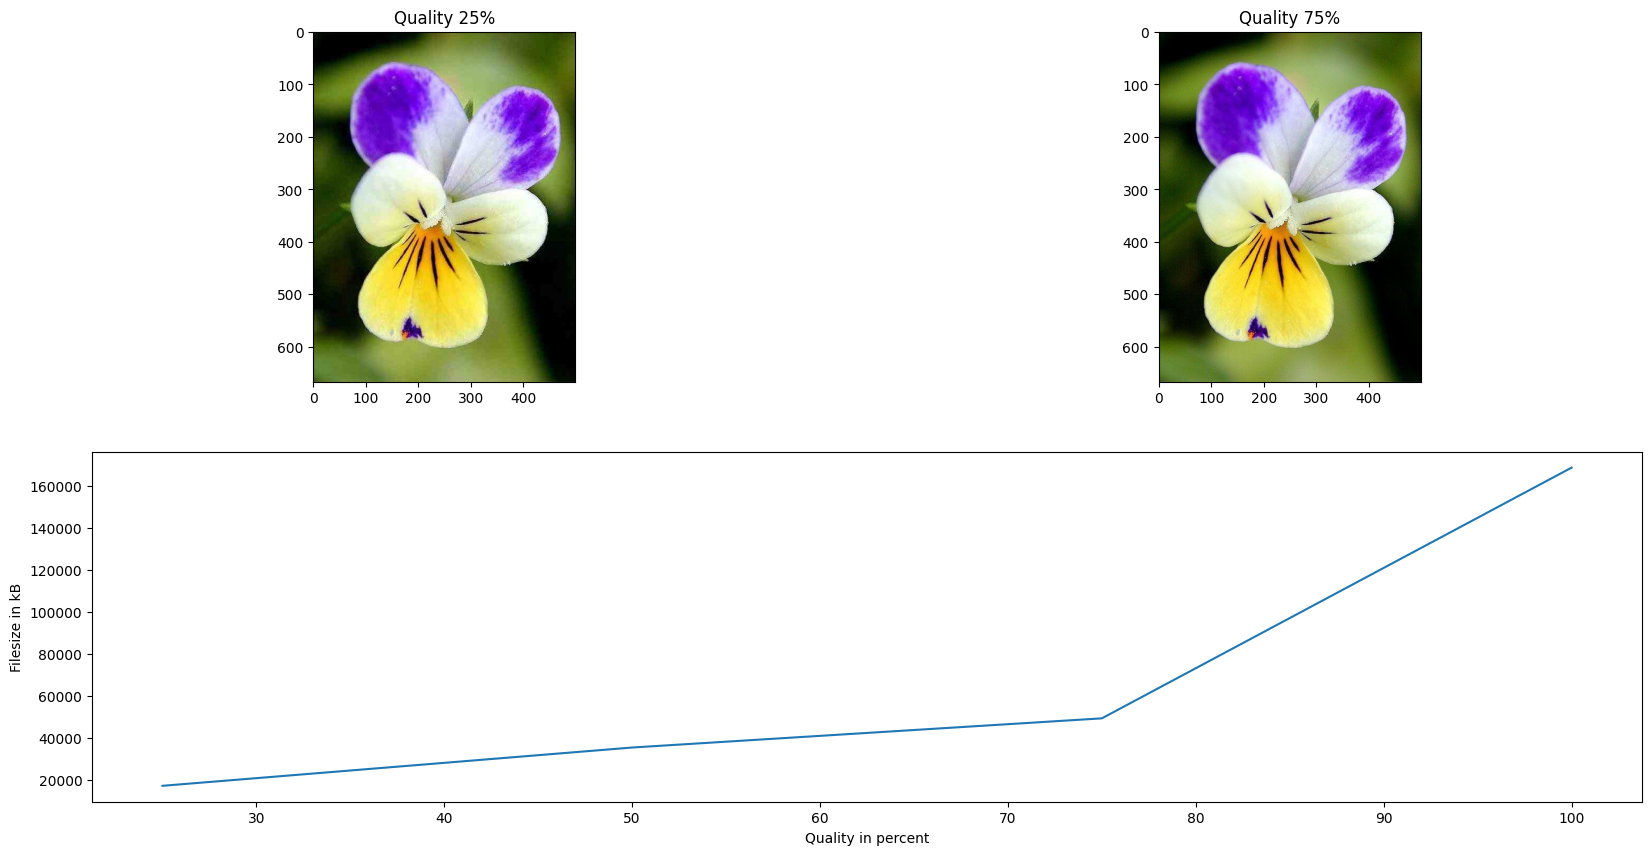

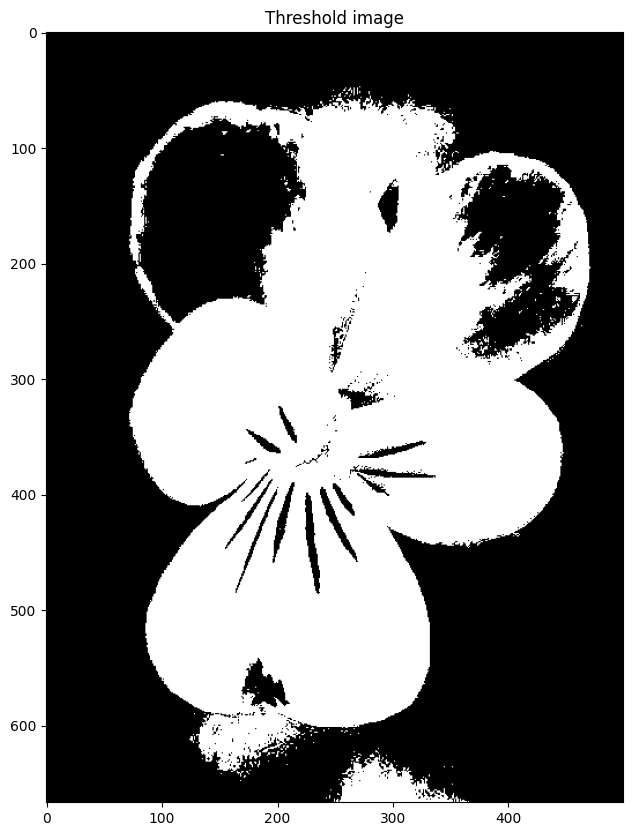

In [3]:
########################################################
######## c)
# Image compression
jpg_qualities = [25,50,75,100]
size = []

# write the images with a specific quality
# if A is in RGB, change it to BGR
A = cv2.cvtColor(A, cv2.COLOR_RGB2BGR) # convert it back to BGR
for jpg_quality in jpg_qualities:
    filename = "./images/flower{}.jpg".format(str(jpg_quality))
    cv2.imwrite(filename, A, [int(cv2.IMWRITE_JPEG_QUALITY), jpg_quality])
    size.append(os.path.getsize(filename))

# Read the two images
img25 = cv2.imread("./images/flower25.jpg")
img25 = cv2.cvtColor(img25, cv2.COLOR_BGR2RGB) # convert it back to RGB
img75 = cv2.imread("./images/flower75.jpg")
img75 = cv2.cvtColor(img75, cv2.COLOR_BGR2RGB) # convert it back to RGB

plt.figure(figsize=(20,10))
plt.subplot(212)
plt.plot(jpg_qualities, size) # Show the plot for the filesize in kB of the images generated
plt.xlabel("Quality in percent")
plt.ylabel("Filesize in kB")
plt.subplot(221)
plt.imshow(img25)
plt.title("Quality 25%")
plt.subplot(222)
plt.imshow(img75)
plt.title("Quality 75%")
plt.show()

########################################################
######## d)
# Thresholding: Black and White (binary) images

# _, means that we are skipping the first output.  
# look in OpenCV documentation to find out what the first output of threshold is
_, Gmask = cv2.threshold(G, 180, 255, cv2.THRESH_BINARY)
_, Rmask = cv2.threshold(R, 150, 255, cv2.THRESH_BINARY)
Fmask = cv2.bitwise_or(Gmask, Rmask)

plt.figure(figsize=(10,10))
plt.imshow(Fmask, cmap='gray', vmin=0, vmax=255)
plt.title('Threshold image')
plt.show()

**Answer to question 2 c)** (describe):

As expected, compressing the image with 100% quality results into an exact copy of the original image, so no degradation occurs.
However, we see that the compressed image (100%) has a filesize more than 3 times the size of the original image:

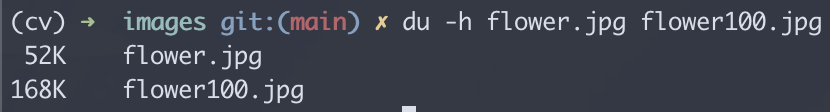

The image generated with 75% quality is visually very similar (at least) to the original image. I couldn't detect any degradation in the image, but the filesize is also exactly the same as the original image. This tells me that the original image was already compressed with 75% quality, thus no degradation occurs. But I would have to look into that further to verify this suspicion.

From 50% quality and below, we can see that the image starts to degrade, as well that the filesizes actually also decrease. Most notably one can observe a noise overlaying the image, particularly in the bright spots. A change to the actual colors is not really visible, but we can also see that the edges get a bit more blurry, e.g. between the petals and the background.

This degradation becomes even more obvious and extreme at 25% quality. Furthermore, it also looks like the background becomes "blocky".

**Answer to question 2 d)** (describe):

Looking back at 2.b), we do see that the pixels with the largest green and red values are in the foreground. However, as discussed in the answer to 2.b), we know that the foreground also contains dark spots, e.g. dark stripes, bottom (and a bit the top) purple spots. These spots are falsely identified as background in the mask.

However, we cannot lower the thresholds in the mask further, as we already misidentify regions the the background as foreground, e.g. the bright spot in the background on the top of the image.

Overall, while imperfect, we are still able to make out the flower in the mask.


## Problem 3

Write a function that extracts a rectangular region from an input image, commonly known as cropping. Give the function the name **image2roi** (roi = region of interest). Let this function work as follows:

**a)** Input parameters should be an iamge and the coordinates for the roi (fname, coords). First check if the image is colour or grey level. If it is colour a message should be printed out and the function closed (return). If it is a grey level image continue to the next step, **b)**.

**b)** The size of the image is computed and the image displayed with indexes shown along the axis. Extract the sub image (region of interest) given the coordinates, display it and the function ended.



In [4]:
from typing import Tuple

'''
Function that takes in input an image and the coordinates for the ROI

Parameters:
    img: the image
    coords: a tuple containing the coordinates of the ROI (x1, y1, x2, y2)
''' 
def image2roi(img, coords: Tuple[int, int, int, int]) -> None:
    
    if len(img.shape) > 2:
        print("The image is not a greyscale image")
        return
    
    # Plot the greyscale image and the ROI based on the coords values
    # extract the sub_image
    x1, y1, x2, y2 = coords
    sub_image = img[y1:y2, x1:x2]

    # display the image
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title('Greyscale image')
    plt.subplot(122)
    plt.imshow(sub_image, cmap='gray', vmin=0, vmax=255)
    plt.title('ROI')
    plt.show()


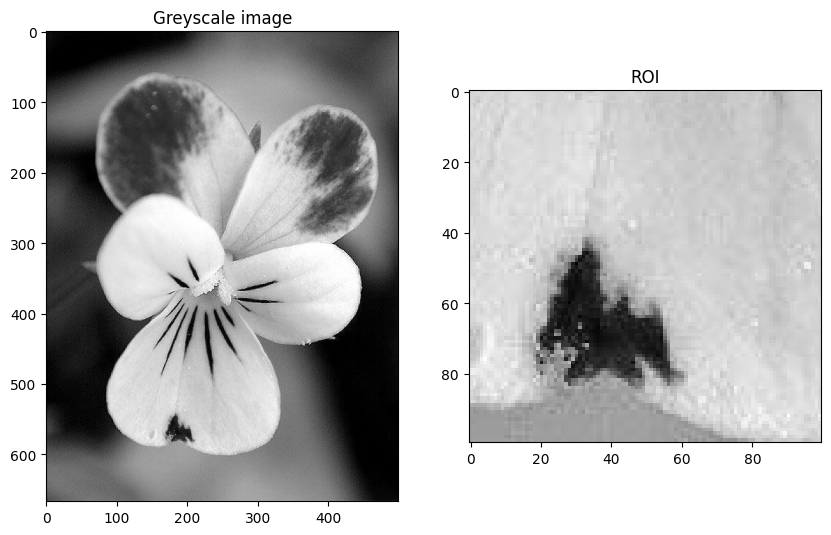

In [5]:
##  To test your function, complete the following lines:

coords = (150, 500, 250, 600)
img = cv2.imread("./images/flower.jpg", cv2.IMREAD_GRAYSCALE)

image2roi(img, coords)

## Problem 4

The representation of a digital image as a column vector is very useful in some occasions. We therefore include this here, from a practical view, using `python`. To explore this we start with a tiny test image. Let the image be


\begin{equation}%\label{eq1} &<- KaTeX Parse-Error
    F(x,y) = \begin{bmatrix} 1 & 2 & 3 & 4\\ 5 & 6 & 7 & 8\\
     9 & 10 & 11 & 12\\ 13 & 14 & 15 & 16\end{bmatrix},
\end{equation}


To produce this image with `numpy`, use:

```python
F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
```

**a)** Use `numpy` to retrieve the first element of the first column, the first column and the first row. Do the same for the last column and row.

**b)** Use the `numpy` function `reshape` to reconstruct the image matrix. Refer to [numpy.reshape](https://numpy.org/doc/1.18/reference/generated/numpy.reshape.html#numpy.reshape) for full documentation.

**c)** Use `numpy` to create a boolean array that contains the value `True` for values multiple of 5 and bigger than 6.  



In [6]:
# Import useful packages
import numpy as np
from pprint import pprint

F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
print("F:")
pprint(F)

print("\n\nProblem 4, answers:")

######## a)
print("\na)")
f_ele = F[0, 0]
f_row = F[0, :].A1
f_col = F[:, 0].A1
print("f_ele: ")
pprint(f_ele)
print("f_row: ")
pprint(f_row) 
print("f_col: ")
pprint(f_col)

l_row = F[-1, :].A1
l_col = F[:, -1].A1
print("l_row: ")
pprint(l_row) 
print("l_col: ")
pprint(l_col)

######## b)
print("\nb)")
f_res = np.reshape(F, (1, 16)).A1 # row major order
print("f_res: ")
pprint(f_res)

######## c)
print("\nc)")
f_bool = np.logical_and(F % 5 == 0, F > 6)
print("f_bool: ")
pprint(f_bool)


F:
matrix([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])


Problem 4, answers:

a)
f_ele: 
1
f_row: 
array([1, 2, 3, 4])
f_col: 
array([ 1,  5,  9, 13])
l_row: 
array([13, 14, 15, 16])
l_col: 
array([ 4,  8, 12, 16])

b)
f_res: 
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

c)
f_bool: 
matrix([[False, False, False, False],
        [False, False, False, False],
        [False,  True, False, False],
        [False, False,  True, False]])



### Delivery (dead line) on CANVAS: 08-09-2023 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Jorge Garcia-Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.